# Importing Libraries

In [56]:
# import tensorflow as tf
# import keras as k
# dir(k)

In [57]:
# from keras.preprocessing import image as i
# dir(i)

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import keras
import tensorflow

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Displaying Images

In [59]:
picture_size = 48
# folder_path = "../input/face-expression-recognition-dataset/images/"
folder_path = "C:/Users/Masum/Desktop/Ai/Human_Emotion_Detection/images/images/"
# C:\Users\Pankaj\Downloads\Compressed\Project\images\images\train

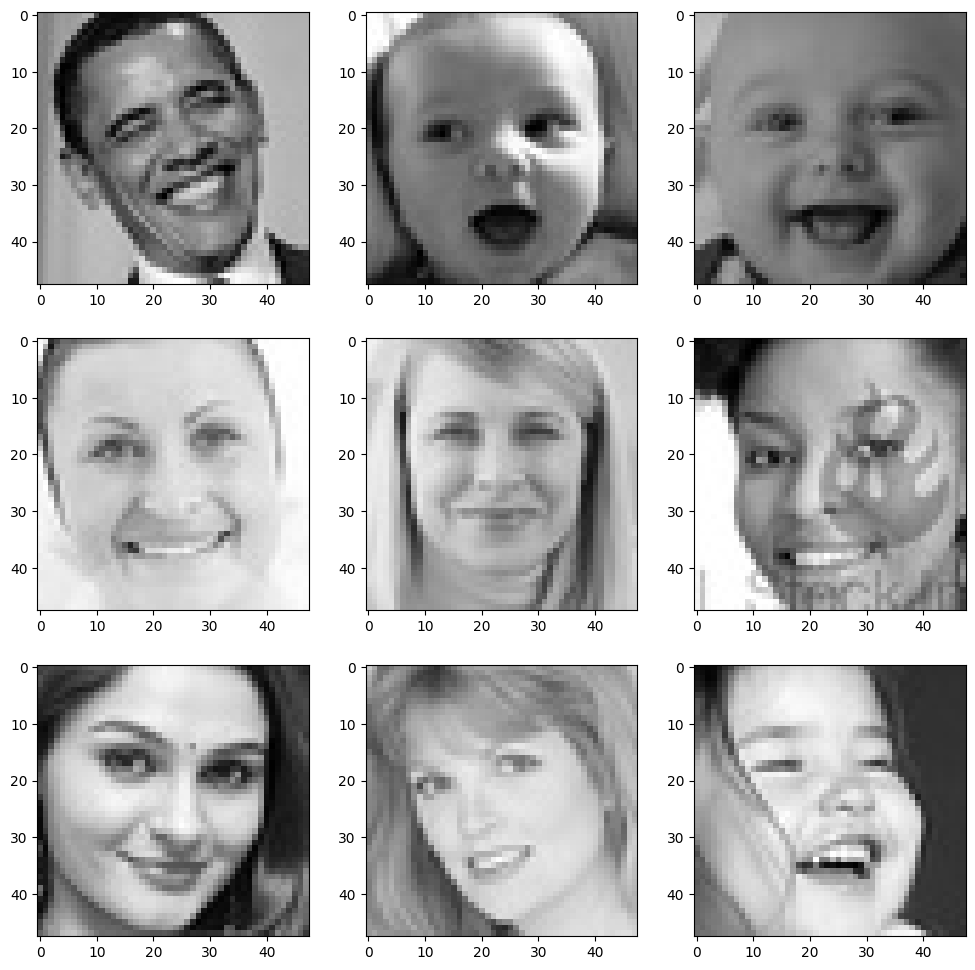

In [60]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    # img = load_img(folder_path+"train/"+expression+"/"+
    #               os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# List all image files


# Making Training and Validation Data

In [61]:
batch_size  = 128
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

## 🔁 Traditional Neural Network (MLP) for Emotion Classification


In [ ]:

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Masum\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

# Fitting the Model with Training and Validation Data 

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# ✅ Set a higher number of epochs here
epochs = 10

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [64]:
if 'X_train_mlp' not in locals():
    X = np.random.rand(1000, 48, 48) 
    y = np.random.randint(0, 7, 1000) 


    X_flattened = X / 255.0 
    X_flattened = X_flattened.reshape((X_flattened.shape[0], -1))

    # One-hot encode the labels
    y_categorical = to_categorical(y, num_classes=7)

    # Split the dataset
    X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(X_flattened, y_categorical, test_size=0.2, random_state=42)

if 'mlp_model' not in locals() or not hasattr(mlp_model, 'optimizer'):
    mlp_model = Sequential()
    mlp_model.add(Dense(512, input_shape=(X_train_mlp.shape[1],), activation='relu'))
    mlp_model.add(Dropout(0.3))
    mlp_model.add(Dense(256, activation='relu'))
    mlp_model.add(Dropout(0.3))
    mlp_model.add(Dense(7, activation='softmax'))  # 7 emotion classes

    mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model
mlp_history = mlp_model.fit(
    X_train_mlp, y_train_mlp,
    epochs=min(epochs, 50),  # Limit epochs to a maximum of 50
    batch_size=batch_size,
    validation_data=(X_val_mlp, y_val_mlp),
    verbose=1
)

# Train the CNN model
cnn_history = model.fit(
    x=train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2956 - loss: 1.9058 - val_accuracy: 0.1500 - val_loss: 1.9549
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3090 - loss: 1.9033 - val_accuracy: 0.1450 - val_loss: 1.9525
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3223 - loss: 1.9027 - val_accuracy: 0.1400 - val_loss: 1.9520
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3038 - loss: 1.8907 - val_accuracy: 0.1650 - val_loss: 1.9533
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3325 - loss: 1.8851 - val_accuracy: 0.0750 - val_loss: 1.9528
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3167 - loss: 1.8835 - val_accuracy: 0.1100 - val_loss: 1.9577
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3134 - loss: 1.8728 - val_accuracy: 0.1400 - val_loss: 1.9559
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3695 - loss: 1.8579 - val_accuracy: 0.1100 - val_loss: 1.9546


C:\Users\Masum\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 222s 974ms/step - accuracy: 0.2751 - loss: 1.9157 - val_accuracy: 0.4156 - val_loss: 1.5990 - learning_rate: 0.0010
Epoch 2/10


C:\Users\Masum\AppData\Roaming\Python\Python310\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/225 ━━━━━━━━━━━━━━━━━━━━ 3:43 999ms/step - accuracy: 0.3984 - loss: 1.6285

C:\Users\Masum\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.3984 - loss: 1.6285 - val_accuracy: 0.3926 - val_loss: 1.7549 - learning_rate: 0.0010
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.4465 - loss: 1.4374 - val_accuracy: 0.4379 - val_loss: 1.4262 - learning_rate: 0.0010
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.4141 - loss: 1.3627 - val_accuracy: 0.4506 - val_loss: 1.4172 - learning_rate: 0.0010
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.4979 - loss: 1.2918 - val_accuracy: 0.4957 - val_loss: 1.2867 - learning_rate: 0.0010
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.5000 - loss: 1.3419 - val_accuracy: 0.5044 - val_loss: 1.2688 - learning_rate: 0.0010
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.5480 - loss: 1.1770 - val_accuracy: 0.5168 - val_loss: 1.2788 - learning_rate: 0.0010
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.5625 - loss: 1.1100 - 

# Plotting Accuracy & Loss

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


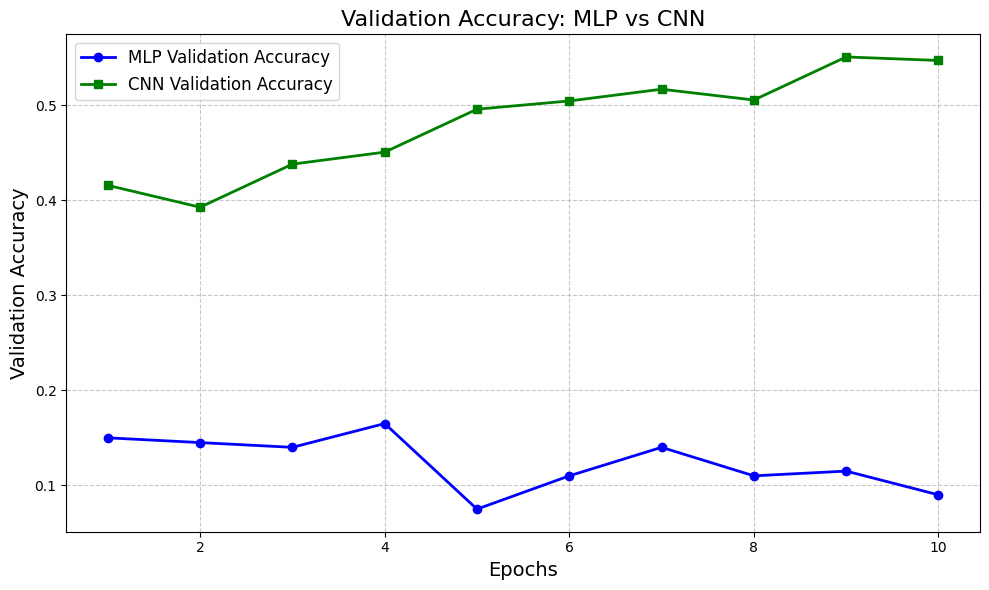

In [65]:
print(mlp_history.history.keys())
print(cnn_history.history.keys())
import matplotlib.pyplot as plt

# Ensure correct style is used before plotting
plt.style.use('default')

# Get validation accuracy lists
mlp_val_acc = mlp_history.history.get('val_accuracy', [])
cnn_val_acc = cnn_history.history.get('val_accuracy', [])

# Plot only if data is available
if mlp_val_acc and cnn_val_acc:
    epochs_range = range(1, len(mlp_val_acc) + 1)  # X-axis

    plt.figure(figsize=(10, 6))
    plt.plot(epochs_range, mlp_val_acc, label='MLP Validation Accuracy', color='blue', linewidth=2, marker='o')
    plt.plot(epochs_range, cnn_val_acc, label='CNN Validation Accuracy', color='green', linewidth=2, marker='s')
    plt.title('Validation Accuracy: MLP vs CNN', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Validation Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Validation accuracy data not available or training didn't run properly.")
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# ✅ Set a higher number of epochs here
epochs = 10

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


C:\Users\Masum\AppData\Local\Temp\ipykernel_24504\3114560092.py:23: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, linestyle='--', alpha=0.4)


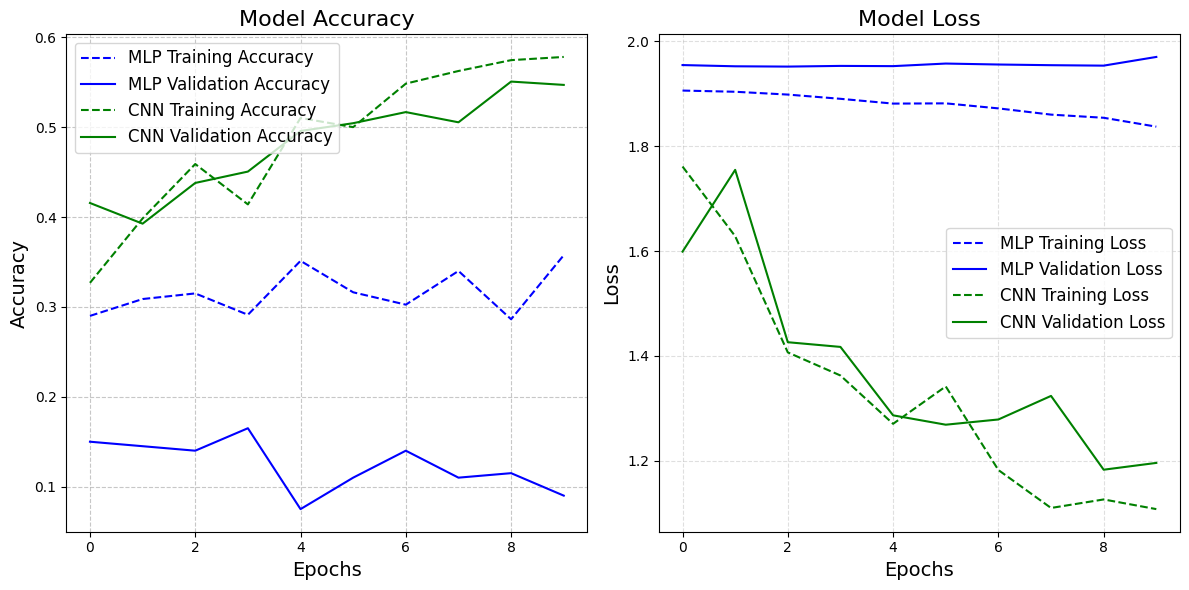

In [66]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['accuracy'], label='MLP Training Accuracy', color='blue', linestyle='--')
plt.plot(mlp_history.history['val_accuracy'], label='MLP Validation Accuracy', color='blue')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy', color='green', linestyle='--')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy', color='green')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['loss'], label='MLP Training Loss', color='blue', linestyle='--')
plt.plot(mlp_history.history['val_loss'], label='MLP Validation Loss', color='blue')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss', color='green', linestyle='--')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss', color='green')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(False, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()